## Guiding Question: What are the most common movies that are watched together? 

## Importing the libraries 

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori, fpgrowth, fpmax
from pandas.plotting import parallel_coordinates
import networkx as nx

%matplotlib inline

## Reading the data

In [73]:
movie_data = pd.read_csv("final_netflix_dataset.csv", low_memory=False, index_col=0)
movie_data.head()

,Year,Cust_Id,User Rating,Title,IMDb Rating,Runtime (IMDb),Genres (IMDb),Num Votes (IMDb),Country,MPA Rating,Runtime (Netflix),Listed_in,Description
0,2003,2173336,5.0,Something's Gotta Give,6.7,128.0,"Comedy, Drama, Romance",124315.0,United States,PG-13,128 min,"Comedies, Romantic Movies","Still sexy at 60, Harry Sanborn wines and dine..."
1,2003,2473170,5.0,Something's Gotta Give,6.7,128.0,"Comedy, Drama, Romance",124315.0,United States,PG-13,128 min,"Comedies, Romantic Movies","Still sexy at 60, Harry Sanborn wines and dine..."
2,2003,900816,3.0,Something's Gotta Give,6.7,128.0,"Comedy, Drama, Romance",124315.0,United States,PG-13,128 min,"Comedies, Romantic Movies","Still sexy at 60, Harry Sanborn wines and dine..."
3,2003,1990901,4.0,Something's Gotta Give,6.7,128.0,"Comedy, Drama, Romance",124315.0,United States,PG-13,128 min,"Comedies, Romantic Movies","Still sexy at 60, Harry Sanborn wines and dine..."
4,2003,662337,4.0,Something's Gotta Give,6.7,128.0,"Comedy, Drama, Romance",124315.0,United States,PG-13,128 min,"Comedies, Romantic Movies","Still sexy at 60, Harry Sanborn wines and dine..."


## Checking the Shape of the DF

In [74]:
movie_data.shape

(6356792, 13)

## Exploratory Data Analysis

###  Most Popular Movies and Counts

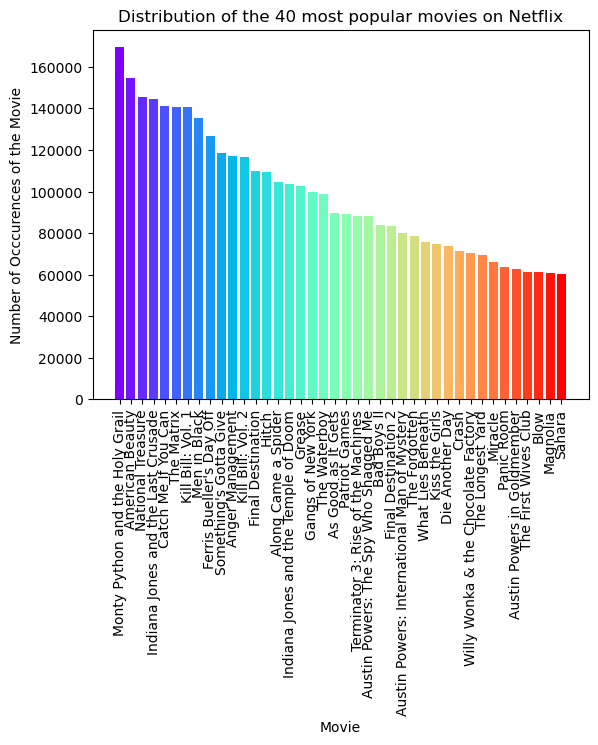

In [75]:
# compute the frequency counts of each movie
counts = movie_data['Title'].value_counts().head(40)

#setting the color of the plot 
color = plt.cm.rainbow(np.linspace(0, 1, 40))

# create a bar plot of the frequency counts
plt.bar(counts.index, counts.values, color = color)

# set the x-axis label
plt.xlabel('Movie')

#setting the rotation of x-axis labels
plt.xticks(rotation = 90)

# set the y-axis label
plt.ylabel('Number of Occcurences of the Movie')

#setting the title
plt.title("Distribution of the 40 most popular movies on Netflix")

# display the plot
plt.show()

### Findings and Explanations

(1) Even though this dsitribution tells us which movies are watched most freqeuntly, what we cannot gauge from here is which of these movies are actually watched together. 

A thorough understanding of that would help us and the Management at Netflix to understand which kind of movies to push to which audience demographic. 

### Average User Rating Distribution

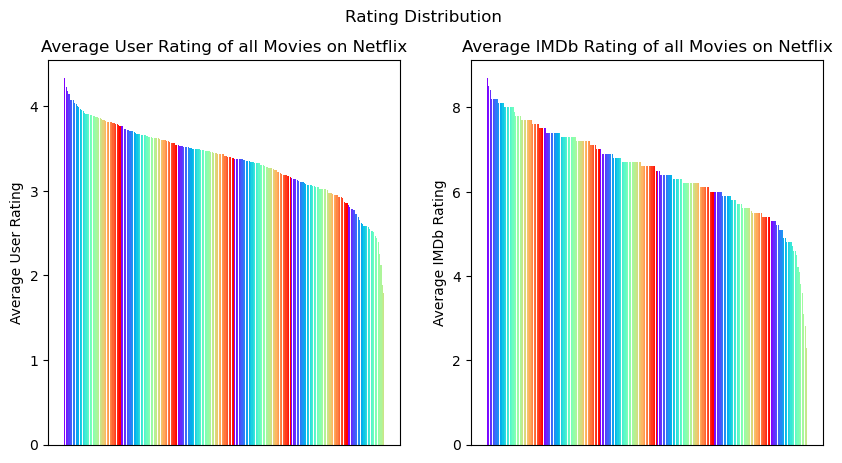

In [107]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

fig.suptitle('Rating Distribution')

# plotting the data as a bar chart
avg_user_rating_movies = movie_data[["Title", "User Rating"]].groupby(["Title"]).mean().reset_index().sort_values(by = "User Rating", ascending = False)[["Title", "User Rating"]]
axes[0].bar(avg_user_rating_movies['Title'], avg_user_rating_movies['User Rating'], color = color)
axes[0].set_title("Average User Rating of all Movies on Netflix")
axes[0].set_xticks([])
axes[0].set_ylabel('Average User Rating')
# plt.show()

# plotting the IMDb Rating data as a bar chart
avg_user_rating_movies = movie_data[["Title", "IMDb Rating"]].groupby(["Title"]).mean().reset_index().sort_values(by = "IMDb Rating", ascending = False)[["Title", "IMDb Rating"]]
axes[1].bar(avg_user_rating_movies['Title'], avg_user_rating_movies['IMDb Rating'], color = color)
axes[1].set_title("Average IMDb Rating of all Movies on Netflix")
axes[1].set_xticks([])
axes[1].set_ylabel('Average IMDb Rating')

plt.show()




### Findings and Explanations

(1) Here, we can understand that there is a pretty even split in the values of Average User Rating and Average IMDb Rating.

However, what this graph cannot tell us right now is which of the movies are bein watched together. That would help us understand which kind of movies to focus on in the future. 

### Creating the Movies Watched List for Each User

In [108]:
watch_history = movie_data.groupby("Cust_Id")['Title'].apply(list).reset_index(name='Movies Watched')
watch_history.head()

,Cust_Id,Movies Watched
0,6,"[Something's Gotta Give, Kill Bill: Vol. 2, Cl..."
1,7,"[Something's Gotta Give, Charlotte's Web, Girl..."
2,8,"[The Forgotten, Terminator 3: Rise of the Mach..."
3,10,"[Girl, American Beauty, What Lies Beneath, Pat..."
4,25,"[Locked Up, Men in Black]"


### Checking the Number of Unique Customers we have in our dataset

In [6]:
watch_history.shape

(433996, 2)

### Using the Transaction Encoder

The Transaction Encoder is being used here to One-Hot Encode the dataframe with the columns as the Movie Names

In [7]:
te = TransactionEncoder()
te_ary = te.fit(watch_history['Movies Watched']).transform(watch_history['Movies Watched'])
watch_histroy_df = pd.DataFrame(te_ary, columns=te.columns_)
watch_histroy_df

,A Family Affair,A Night at the Roxbury,A Wrinkle in Time,Aitraaz,Alive and Kicking,Along Came a Spider,Amar Akbar Anthony,American Beauty,American Psycho,Andaz Apna Apna,...,Tremors,Tremors 3: Back to Perfection,Tremors 4: The Legend Begins,Trimurti,True Grit,U Turn,What Lies Beneath,Wild Wild West,Willy Wonka & the Chocolate Factory,Yuva
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
433992,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
433993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
433994,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Modeling

## Model 1 -  Apriori Algorithm

### Generating the Item Sets

In [8]:
frequent_movies = apriori(watch_histroy_df, min_support=0.1, use_colnames=True)
frequent_movies

,support,itemsets
0,0.241477,(Along Came a Spider)
1,0.356759,(American Beauty)
2,0.270311,(Anger Management)
3,0.207126,(As Good as It Gets)
4,0.145077,(Austin Powers in Goldmember)
...,...,...
511,0.103994,"(Kill Bill: Vol. 1, The Matrix, Indiana Jones ..."
512,0.114803,"(The Matrix, Men in Black, Indiana Jones and t..."
513,0.109250,"(Kill Bill: Vol. 2, Kill Bill: Vol. 1, The Mat..."
514,0.102019,"(Kill Bill: Vol. 1, The Matrix, Men in Black, ..."


So, we can see that we have generated a set of 516 antecedents which will serve as the axis for the rules we will generate later on. All of these antecedents have a support metric which is greater than 0.1. 

### Association Rule Mining using Support Metric

In [9]:
#creating the Association Rules based on the Support metric being greater than 0.1 
rules_based_on_support = association_rules(frequent_movies, metric="support", min_threshold=0.1)

#sorting the dataframe in descending order of support
rules_based_on_support.sort_values(by = "support", ascending = False, inplace = True)

# #finding the top 10 rules and storing it in a dataframe
first_10_for_rules_based_on_support = rules_based_on_support.head(10)

#printing out the dataframe
first_10_for_rules_based_on_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
375,(Kill Bill: Vol. 1),(Kill Bill: Vol. 2),0.323883,0.269039,0.227882,0.703594,2.615209,0.140745,2.466080,0.913483
374,(Kill Bill: Vol. 2),(Kill Bill: Vol. 1),0.269039,0.323883,0.227882,0.847022,2.615209,0.140745,4.419704,0.844945
68,(The Matrix),(American Beauty),0.324342,0.356759,0.210921,0.650306,1.822815,0.095209,1.839439,0.668086
69,(American Beauty),(The Matrix),0.356759,0.324342,0.210921,0.591215,1.822815,0.095209,1.652845,0.701756
421,(Men in Black),(The Matrix),0.312097,0.324342,0.210857,0.675612,2.083026,0.109631,2.082872,0.755818
420,(The Matrix),(Men in Black),0.324342,0.312097,0.210857,0.650107,2.083026,0.109631,1.966037,0.769515
34,(Ferris Bueller's Day Off),(American Beauty),0.292205,0.356759,0.202269,0.692215,1.940289,0.098022,2.089907,0.684680
35,(American Beauty),(Ferris Bueller's Day Off),0.356759,0.292205,0.202269,0.566963,1.940289,0.098022,1.634489,0.753392
52,(Men in Black),(American Beauty),0.312097,0.356759,0.197285,0.632127,1.771860,0.085942,1.748542,0.633260
53,(American Beauty),(Men in Black),0.356759,0.312097,0.197285,0.552993,1.771860,0.085942,1.538908,0.677229


### Association Rule Mining based on Lift Metric

In [10]:
#creating the Association Rules based on the Lift metric being greater than 0.7 
rules_based_on_lift = association_rules(frequent_movies, metric="lift", min_threshold=0.7)

#sorting the dataframe in descending order of Lift
rules_based_on_lift.sort_values(by = "lift", ascending = False, inplace = True)

# #finding the top 10 rules and storing it in a dataframe
first_10_for_rules_based_on_lift = rules_based_on_lift.head(10)

#printing out the dataframe
first_10_for_rules_based_on_lift



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2124,"(Kill Bill: Vol. 2, Men in Black)","(Kill Bill: Vol. 1, The Matrix)",0.137769,0.190009,0.108084,0.784533,4.128932,0.081907,3.759232,0.878890
2125,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Men in Black)",0.190009,0.137769,0.108084,0.568837,4.128932,0.081907,1.999780,0.935574
2123,"(Kill Bill: Vol. 2, The Matrix)","(Kill Bill: Vol. 1, Men in Black)",0.161907,0.163276,0.108084,0.667568,4.088594,0.081648,2.516979,0.901352
2126,"(Kill Bill: Vol. 1, Men in Black)","(Kill Bill: Vol. 2, The Matrix)",0.163276,0.161907,0.108084,0.661972,4.088594,0.081648,2.479360,0.902827
2041,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Ferris Bueller's Day Off)",0.190009,0.139568,0.107208,0.564229,4.042677,0.080689,1.974504,0.929194
2040,"(Kill Bill: Vol. 2, Ferris Bueller's Day Off)","(Kill Bill: Vol. 1, The Matrix)",0.139568,0.190009,0.107208,0.768144,4.042677,0.080689,3.493506,0.874723
2095,"(Kill Bill: Vol. 2, The Matrix)","(Kill Bill: Vol. 1, Indiana Jones and the Last...",0.161907,0.167223,0.109250,0.674769,4.035152,0.082175,2.560572,0.897487
2098,"(Kill Bill: Vol. 1, Indiana Jones and the Last...","(Kill Bill: Vol. 2, The Matrix)",0.167223,0.161907,0.109250,0.653319,4.035152,0.082175,2.417479,0.903216
2096,"(Kill Bill: Vol. 2, Indiana Jones and the Last...","(Kill Bill: Vol. 1, The Matrix)",0.143029,0.190009,0.109250,0.763830,4.019976,0.082073,3.429700,0.876625
2097,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Indiana Jones and the Last...",0.190009,0.143029,0.109250,0.574973,4.019976,0.082073,2.016274,0.927470


### Next Steps

Now that we hav e found the Association Rules using the Apriori Algorithm, let's look at a significantly computationally more efficient algorithm for the Association Rule Mining - FPGrowth.

## Model 2 - FPGrowth Algorithm

### Generating the Item Sets

In [12]:
#running the FPGrowth algorithm
frequent_movies_fp = fpgrowth(watch_histroy_df, min_support=0.1, use_colnames=True)

#sorting the values by descending order of Support
frequent_movies_fp.sort_values(by = "support", ascending = False)

#printing out
frequent_movies_fp

,support,itemsets
0,0.335349,(National Treasure)
1,0.332538,(Indiana Jones and the Last Crusade)
2,0.325056,(Catch Me If You Can)
3,0.324342,(The Matrix)
4,0.323883,(Kill Bill: Vol. 1)
...,...,...
511,0.105307,"(Austin Powers in Goldmember, American Beauty)"
512,0.104630,"(Austin Powers in Goldmember, Ferris Bueller's..."
513,0.103784,"(Austin Powers in Goldmember, Men in Black)"
514,0.103397,"(Wild Wild West, Men in Black)"


### Generating the Rules based on the Support metric with the FPGrowth itemset

In [13]:
#creating the Association Rules based on the Support metric being greater than 0.1, but with the FPGrowth rules
fp_rules = association_rules(frequent_movies_fp, metric="support", min_threshold=0.1)

#sorting the rules using in descending order of Support 
fp_rules.sort_values(by = "support", ascending = False, inplace = True)

#finding the top 10 rules
first_10_for_rules_based_on_support_fp = fp_rules.head(10)

#printing
first_10_for_rules_based_on_support_fp


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
525,(Kill Bill: Vol. 1),(Kill Bill: Vol. 2),0.323883,0.269039,0.227882,0.703594,2.615209,0.140745,2.466080,0.913483
524,(Kill Bill: Vol. 2),(Kill Bill: Vol. 1),0.269039,0.323883,0.227882,0.847022,2.615209,0.140745,4.419704,0.844945
30,(The Matrix),(American Beauty),0.324342,0.356759,0.210921,0.650306,1.822815,0.095209,1.839439,0.668086
31,(American Beauty),(The Matrix),0.356759,0.324342,0.210921,0.591215,1.822815,0.095209,1.652845,0.701756
163,(Men in Black),(The Matrix),0.312097,0.324342,0.210857,0.675612,2.083026,0.109631,2.082872,0.755818
162,(The Matrix),(Men in Black),0.324342,0.312097,0.210857,0.650107,2.083026,0.109631,1.966037,0.769515
1125,(American Beauty),(Ferris Bueller's Day Off),0.356759,0.292205,0.202269,0.566963,1.940289,0.098022,1.634489,0.753392
1124,(Ferris Bueller's Day Off),(American Beauty),0.292205,0.356759,0.202269,0.692215,1.940289,0.098022,2.089907,0.684680
173,(American Beauty),(Men in Black),0.356759,0.312097,0.197285,0.552993,1.771860,0.085942,1.538908,0.677229
172,(Men in Black),(American Beauty),0.312097,0.356759,0.197285,0.632127,1.771860,0.085942,1.748542,0.633260


### Generating the rules based on the Lift Metric using the FPGrowth itemset

In [14]:
#creating the Association Rules based on the Lift metric being greater than 0.7, but with the FPGrowth rules
fp_rules_lift = association_rules(frequent_movies_fp, metric="lift", min_threshold=0.7)

#sorting the rules using in descending order of Lift 
fp_rules_lift.sort_values(by = "lift", ascending = False, inplace = True)

#finding the top 10 rules
first_10_for_rules_based_on_lift_fp = fp_rules_lift.head(10)

#printing
first_10_for_rules_based_on_lift_fp


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
705,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Men in Black)",0.190009,0.137769,0.108084,0.568837,4.128932,0.081907,1.999780,0.935574
704,"(Kill Bill: Vol. 2, Men in Black)","(Kill Bill: Vol. 1, The Matrix)",0.137769,0.190009,0.108084,0.784533,4.128932,0.081907,3.759232,0.878890
703,"(Kill Bill: Vol. 2, The Matrix)","(Kill Bill: Vol. 1, Men in Black)",0.161907,0.163276,0.108084,0.667568,4.088594,0.081648,2.516979,0.901352
706,"(Kill Bill: Vol. 1, Men in Black)","(Kill Bill: Vol. 2, The Matrix)",0.163276,0.161907,0.108084,0.661972,4.088594,0.081648,2.479360,0.902827
793,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Ferris Bueller's Day Off)",0.190009,0.139568,0.107208,0.564229,4.042677,0.080689,1.974504,0.929194
792,"(Kill Bill: Vol. 2, Ferris Bueller's Day Off)","(Kill Bill: Vol. 1, The Matrix)",0.139568,0.190009,0.107208,0.768144,4.042677,0.080689,3.493506,0.874723
645,"(Kill Bill: Vol. 2, The Matrix)","(Kill Bill: Vol. 1, Indiana Jones and the Last...",0.161907,0.167223,0.109250,0.674769,4.035152,0.082175,2.560572,0.897487
648,"(Kill Bill: Vol. 1, Indiana Jones and the Last...","(Kill Bill: Vol. 2, The Matrix)",0.167223,0.161907,0.109250,0.653319,4.035152,0.082175,2.417479,0.903216
646,"(Kill Bill: Vol. 2, Indiana Jones and the Last...","(Kill Bill: Vol. 1, The Matrix)",0.143029,0.190009,0.109250,0.763830,4.019976,0.082073,3.429700,0.876625
647,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Indiana Jones and the Last...",0.190009,0.143029,0.109250,0.574973,4.019976,0.082073,2.016274,0.927470


### Creating heatmaps of the top 10 rules created by using pruning with the Lift and Support Metrics

In [15]:
# Convert antecedents and consequents into strings
apriori_heatmap_support = first_10_for_rules_based_on_support.copy()
apriori_heatmap_support['antecedents'] = first_10_for_rules_based_on_support['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_heatmap_support['consequents'] = first_10_for_rules_based_on_support['consequents'].apply(lambda a: ','.join(list(a)))

apriori_heatmap_lift = first_10_for_rules_based_on_lift.copy()
apriori_heatmap_lift['antecedents'] = first_10_for_rules_based_on_lift['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_heatmap_lift['consequents'] = first_10_for_rules_based_on_lift['consequents'].apply(lambda a: ','.join(list(a)))

fpg_heatmap_support = first_10_for_rules_based_on_support_fp.copy()
fpg_heatmap_support['antecedents'] = first_10_for_rules_based_on_support_fp['antecedents'].apply(lambda a: ','.join(list(a)))
fpg_heatmap_support['consequents'] = first_10_for_rules_based_on_support_fp['consequents'].apply(lambda a: ','.join(list(a)))

fpg_heatmap_lift = first_10_for_rules_based_on_lift_fp.copy()
fpg_heatmap_lift['antecedents'] = first_10_for_rules_based_on_lift_fp['antecedents'].apply(lambda a: ','.join(list(a)))
fpg_heatmap_lift['consequents'] = first_10_for_rules_based_on_lift_fp['consequents'].apply(lambda a: ','.join(list(a)))


# Transform antecedent, consequent, and support columns into matrix
support_table_apriori = apriori_heatmap_support.pivot(index='consequents', columns='antecedents', values='support')
lift_table_apriori = apriori_heatmap_lift.pivot(index='consequents', columns='antecedents', values='support')
support_table_fpg = fpg_heatmap_support.pivot(index='consequents', columns='antecedents', values='support')
lift_table_fpg = fpg_heatmap_lift.pivot(index='consequents', columns='antecedents', values='support')


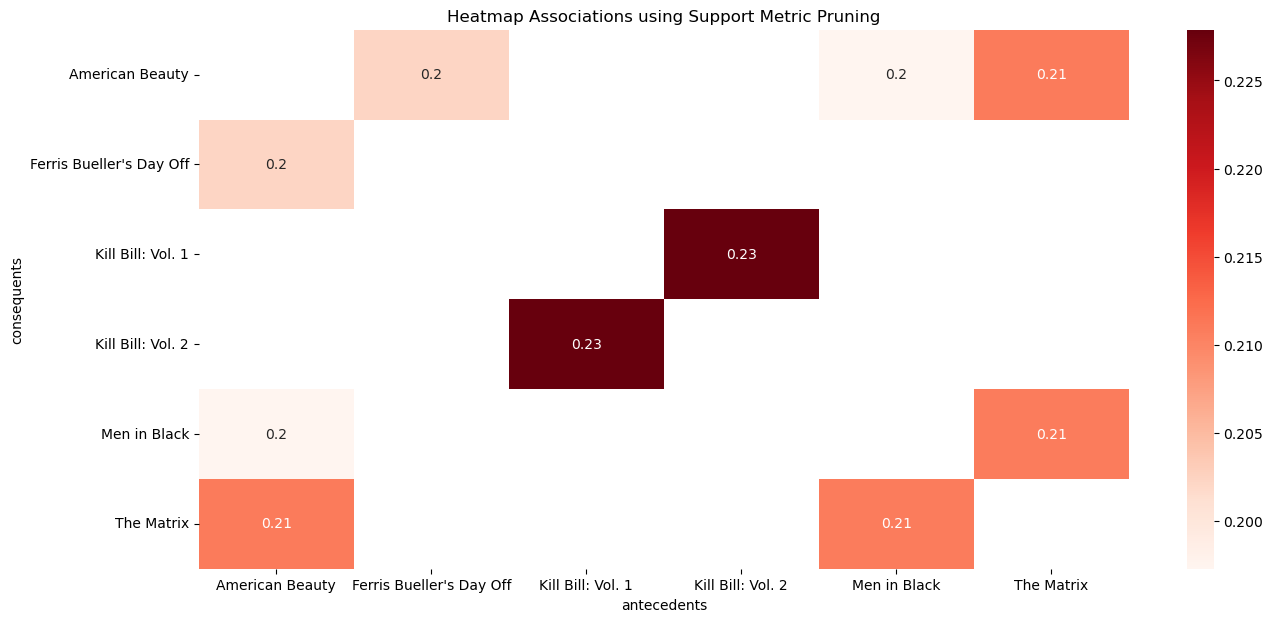

In [16]:
plt.figure(figsize=(15, 7))
plt.title("Heatmap Associations using Support Metric Pruning")
sns.heatmap(data = support_table_apriori, annot=True, cmap = "Reds")
plt.show()

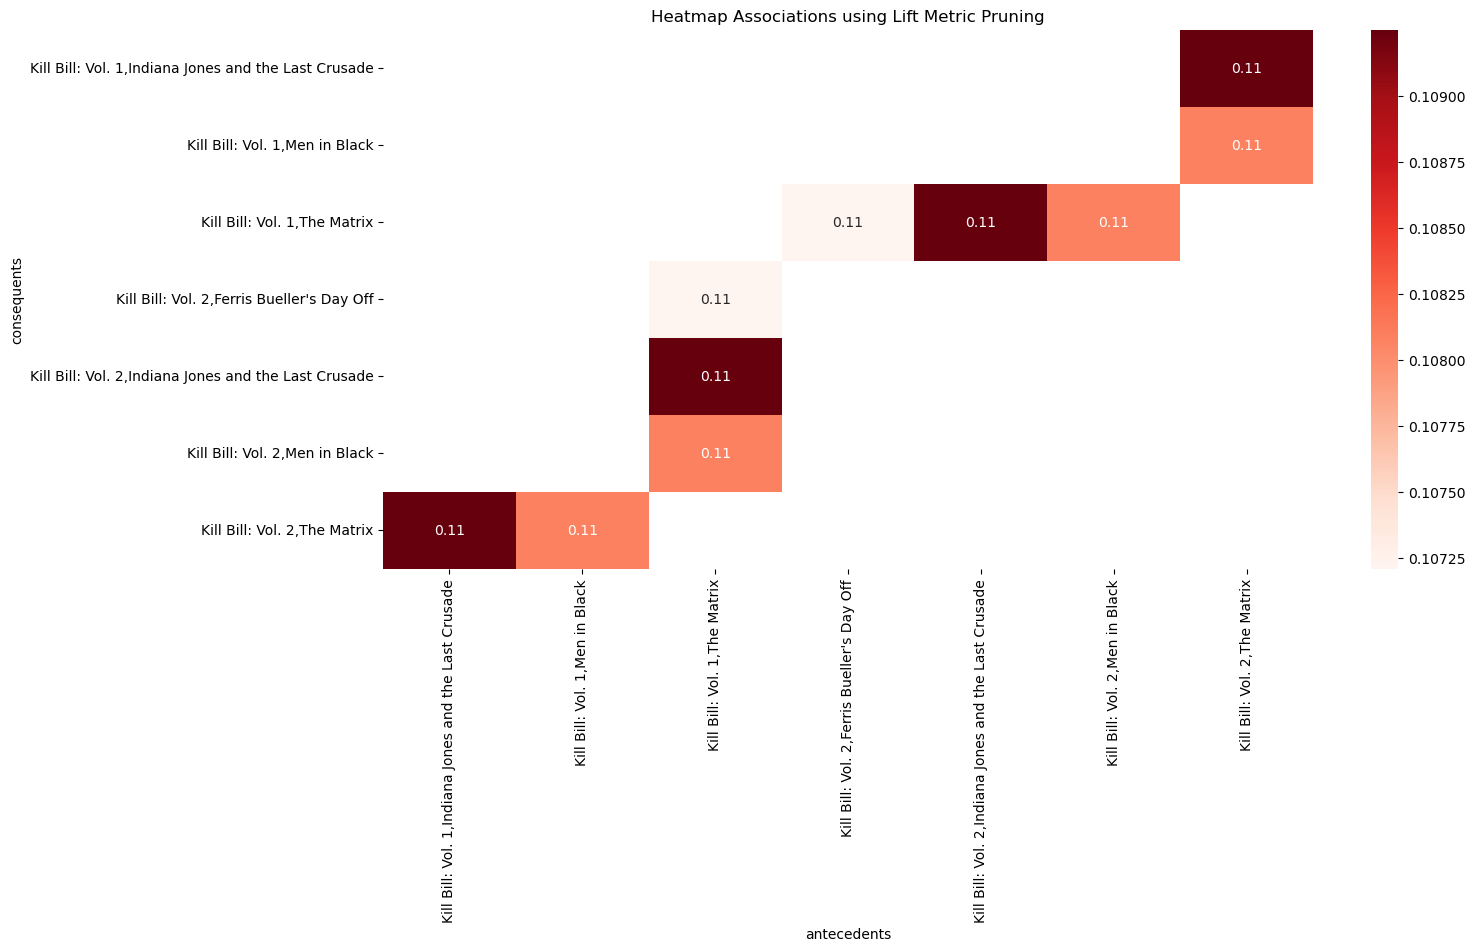

In [17]:
plt.figure(figsize=(15, 7))
plt.title("Heatmap Associations using Lift Metric Pruning")
sns.heatmap(data = lift_table_apriori, annot=True, cmap = "Reds")
plt.show()

In [18]:
# filtering out only the antecedents and the consequents from all the dataframes
first_10_for_rules_based_on_lift_fp = first_10_for_rules_based_on_lift_fp[["antecedents", "consequents"]]
first_10_for_rules_based_on_support_fp = first_10_for_rules_based_on_support_fp[["antecedents", "consequents"]]
first_10_for_rules_based_on_lift = first_10_for_rules_based_on_lift[["antecedents", "consequents"]]
first_10_for_rules_based_on_support = first_10_for_rules_based_on_support[["antecedents", "consequents"]]

### First 10 Rules Based on Lift Metric

In [19]:
print("First 10 Rules Based on Lift Metric")
first_10_for_rules_based_on_lift

First 10 Rules Based on Lift Metric


,antecedents,consequents
2124,"(Kill Bill: Vol. 2, Men in Black)","(Kill Bill: Vol. 1, The Matrix)"
2125,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Men in Black)"
2123,"(Kill Bill: Vol. 2, The Matrix)","(Kill Bill: Vol. 1, Men in Black)"
2126,"(Kill Bill: Vol. 1, Men in Black)","(Kill Bill: Vol. 2, The Matrix)"
2041,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Ferris Bueller's Day Off)"
2040,"(Kill Bill: Vol. 2, Ferris Bueller's Day Off)","(Kill Bill: Vol. 1, The Matrix)"
2095,"(Kill Bill: Vol. 2, The Matrix)","(Kill Bill: Vol. 1, Indiana Jones and the Last..."
2098,"(Kill Bill: Vol. 1, Indiana Jones and the Last...","(Kill Bill: Vol. 2, The Matrix)"
2096,"(Kill Bill: Vol. 2, Indiana Jones and the Last...","(Kill Bill: Vol. 1, The Matrix)"
2097,"(Kill Bill: Vol. 1, The Matrix)","(Kill Bill: Vol. 2, Indiana Jones and the Last..."


### First 10 Rules Based on Support Metric

In [20]:
print("First 10 Rules Based on Support Metric")
first_10_for_rules_based_on_support

First 10 Rules Based on Support Metric


,antecedents,consequents
375,(Kill Bill: Vol. 1),(Kill Bill: Vol. 2)
374,(Kill Bill: Vol. 2),(Kill Bill: Vol. 1)
68,(The Matrix),(American Beauty)
69,(American Beauty),(The Matrix)
421,(Men in Black),(The Matrix)
420,(The Matrix),(Men in Black)
34,(Ferris Bueller's Day Off),(American Beauty)
35,(American Beauty),(Ferris Bueller's Day Off)
52,(Men in Black),(American Beauty)
53,(American Beauty),(Men in Black)


### Exploring the Confidence - Support Border in the FPGrowth Algorithm

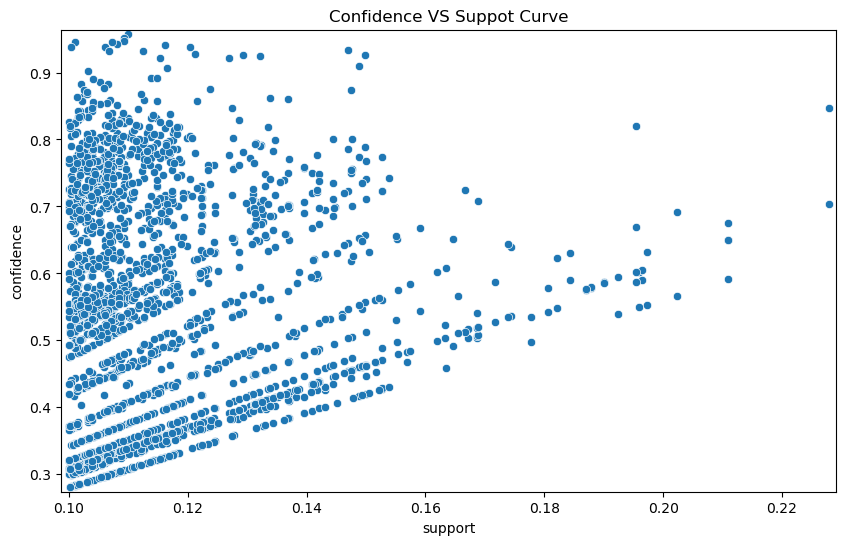

In [21]:
#creating the Association Rules based on the Support metric being greater than 0.1, but with the FPGrowth rules
fp_rules_for_confidence_support_border = association_rules(frequent_movies_fp, metric="support", min_threshold=0.0)

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
plt.title("Confidence VS Suppot Curve")
sns.scatterplot(x = "support", y = "confidence", data = fp_rules_for_confidence_support_border)
plt.margins(0.01,0.01)
plt.show()



### Exploring the Optimality of the Support - Confidence Border

For this, we scale the size of the points in the scatterplot to the magnitude of the lift metric. This will help us deetermine whether the frontier lies on the Support - Confidence Border

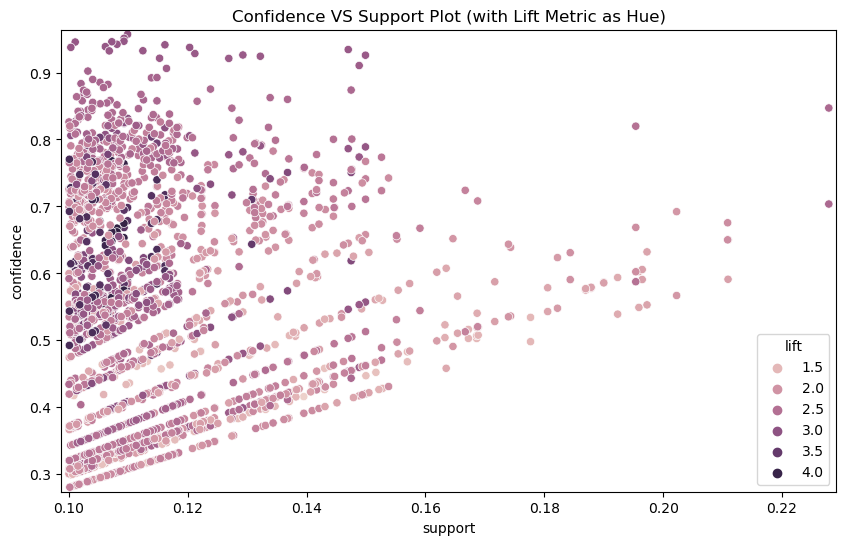

In [22]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
plt.title("Confidence VS Support Plot (with Lift Metric as Hue)")
sns.scatterplot(x = "support", y = "confidence", 
                hue = "lift", data = fp_rules_for_confidence_support_border)
plt.margins(0.01,0.01)
plt.show()

### Findings and Explanations

In association rule mining, the support and confidence measures are used to evaluate the strength of a rule. The support of a rule is the proportion of transactions in the dataset that contain both the antecedent and the consequent items, while the confidence of a rule is the proportion of transactions containing the antecedent that also contain the consequent.

(1) The confidence-support border is a visual representation of the relationship between the support and confidence measures. It is a scatter plot where the x-axis represents the support of a rule and the y-axis represents the confidence. Each point in the plot represents a rule, and the color and size of the point here describes the Lift metric for that particular rule. 

(2) The confidence-support border can be used to evaluate the trade-off between support and confidence when selecting rules. Rules that are close to the upper-right corner of the plot have high support and high confidence, indicating that they are strong rules that are well-supported by the data. Rules that are close to the lower-left corner of the plot have low support and low confidence, indicating that they are weak rules that are not well-supported by the data.

The border between the two regions represents a threshold where rules with high support but low confidence and rules with high confidence but low support are excluded.



### Using Parallel Plots to Visualize the Rules

In [23]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

### Visualizing the Rules derived from Support Metric Pruning

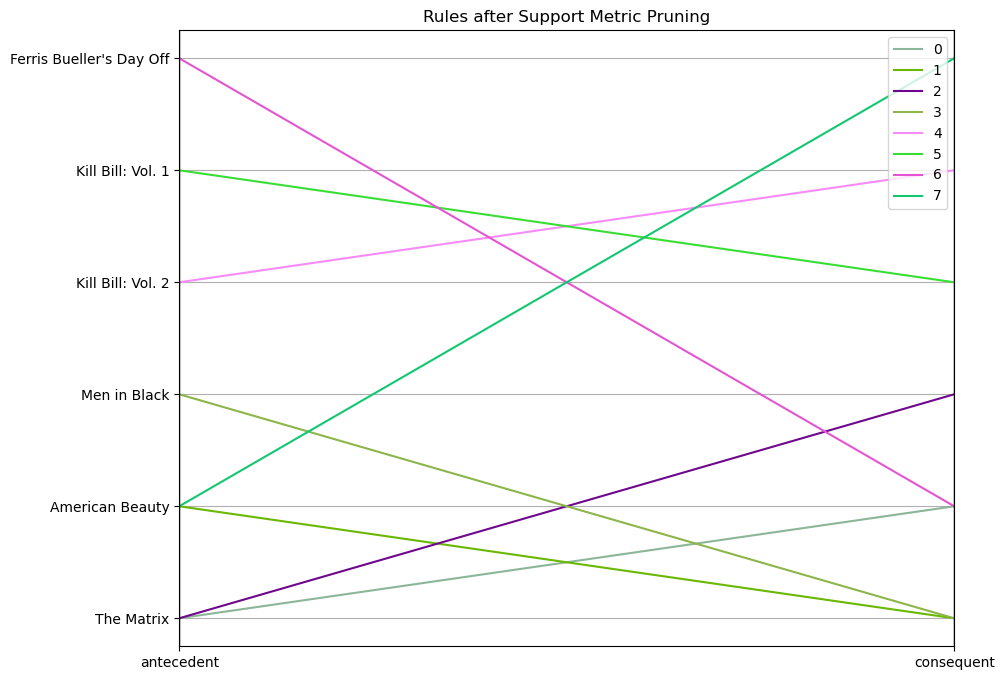

In [112]:
# Compute rules from the frequent itemsets
rules_support = association_rules(frequent_movies_fp, metric = 'support', 
                          min_threshold = 0.2)

rules_lift = association_rules(frequent_movies_fp, metric = 'support', 
                          min_threshold = 0.2)


# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords_support = rules_to_coordinates(rules_support)

plt.figure(figsize=(10,8))
parallel_coordinates(coords_support, 'rule')
plt.title("Rules after Support Metric Pruning")
plt.grid(True)
plt.show()

### Visualizing the Rules after the Lift Metric Pruning

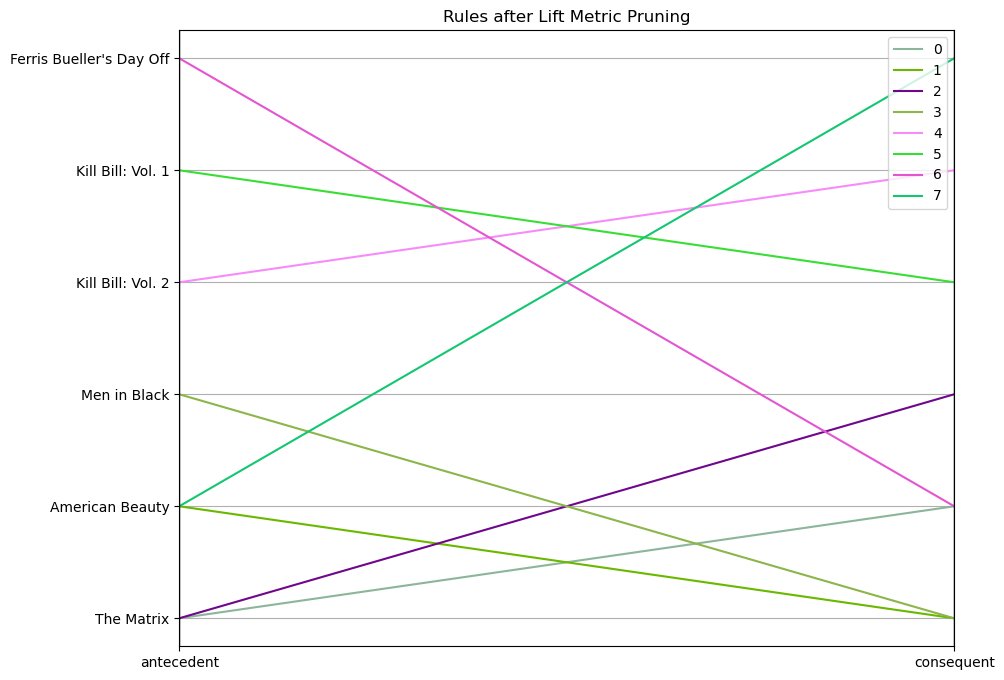

In [113]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords_lift = rules_to_coordinates(rules_lift)

plt.figure(figsize=(10,8))
parallel_coordinates(coords_lift, 'rule')
plt.title("Rules after Lift Metric Pruning")
plt.grid(True)
plt.show()

### Findings and Explanations

(1) In our parallel plot, each axis represents a different variable, and the lines connecting the axes represent the values of those variables for each data point - for our case, these variables are the movies/itemsets. These are then used to visualize the relationships between the antecedents and consequents of different rules.

(2) By examining the parallel plots, we can identify patterns and relationships between different rules. For example, we can see that (Kill Bill Vol. 1 + Kill Bill Vol. 2) is the most freqent combination followed by Ferris Bueller's Day Off + American Beauty)


In general, if certain antecedents or consequents tend to occur together, or if there are any clear patterns in the values of the different variables. This can help us gain a better understanding of the underlying relationships in our data and identify areas for further analysis and help us move towards a Recommendation System. 

## References 

(1) Lab 10 

(2) https://goldinlocks.github.io/Market-Basket-Analysis-in-Python/

(3) LectureUL_Review.pdf

(4) https://www.geeksforgeeks.org/association-rule/

(5) https://www.techtarget.com/searchbusinessanalytics/definition/association-rules-in-data-mining#:~:text=The%20strength%20of%20a%20given,to%20be%20true%20in%20practice.

(6) https://towardsdatascience.com/association-rules-2-aa9a77241654

(7) https://towardsdatascience.com/a-guide-to-association-rule-mining-96c42968ba6

(8) https://medium.com/@24littledino/association-mining-support-association-rules-and-confidence-60132a37e355

(9) Lecture 19, Lecture 20